In [392]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Defining the path of file
file = "messi_goals.csv"
data = pd.read_csv(file, encoding = 'ISO-8859-1')

#Removing the Missing Values
data.dropna()

#Taking a look of data
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            704 non-null    object
 1   Competition       704 non-null    object
 2   Matchday          704 non-null    object
 3   Date              704 non-null    object
 4   Venue             704 non-null    object
 5   Club              704 non-null    object
 6   Opponent          704 non-null    object
 7   Result            704 non-null    object
 8   Playing_Position  704 non-null    object
 9   Minute            704 non-null    int64 
 10  At_score          704 non-null    object
 11  Type              703 non-null    object
 12  Goal_assist       490 non-null    object
dtypes: int64(1), object(12)
memory usage: 71.6+ KB


In [394]:
#Shows the basic statistics
data.describe()

,Minute
count,704.000000
mean,51.923295
std,25.933163
min,3.000000
25%,30.000000
50%,54.000000
75%,75.000000
max,110.000000


In [406]:
#Kurtosis of the data
data.kurt(numeric_only=True)

Minute   -1.192113
dtype: float64

In [408]:
#Skewness of the data
data.skew(numeric_only=True)

Minute   -0.110139
dtype: float64

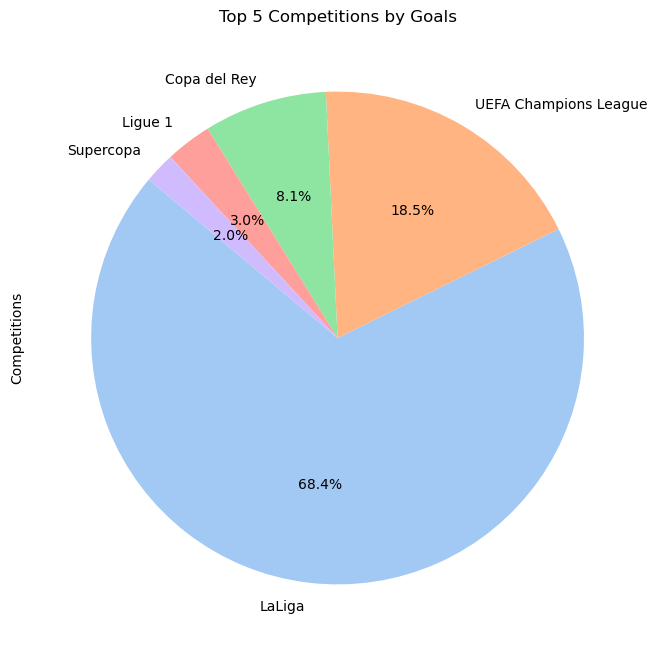

In [436]:
#pie chart of goals by top 5 scoring competition
"""
Created a pie chart showing the distribution of goals scored in the top 5 competitions. 
"""

def plot_top5_goals_by_competition_pie(data):
    top5_competitions = data['Competition'].value_counts().nlargest(5)
    
    plt.figure(figsize=(10,8))
    top5_competitions.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.ylabel('Competitions')
    plt.title('Top 5 Competitions by Goals')
    plt.show()

#Calling the plot
plot_top5_goals_by_competition_pie(data)

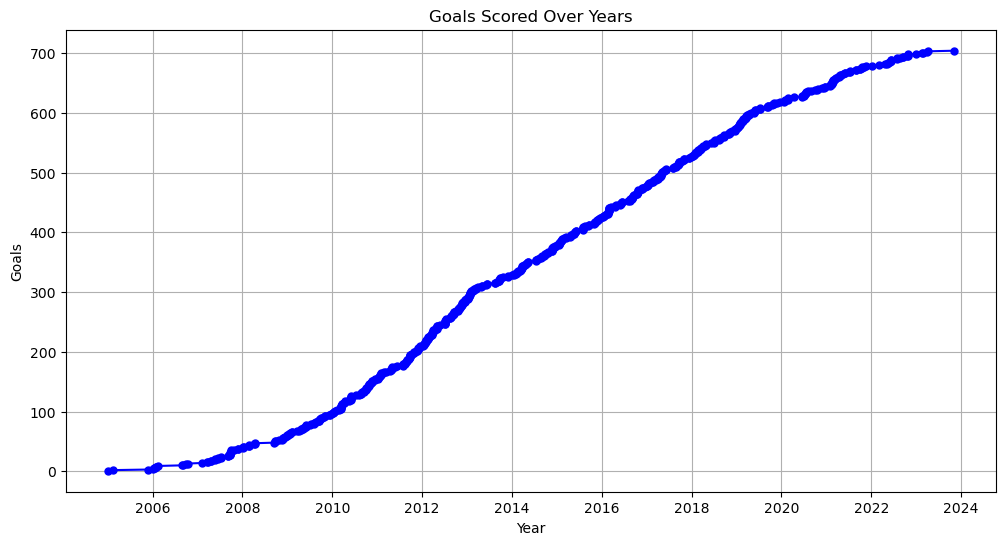

In [440]:
#Line Chart of Goals over Years
""" 
Converted the date column to datetime.
Sorted the date column for cumulative goal counts.
Created a line chart for goals scored over years. 
"""

def plot_goals_over_time_line(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data_sorted = data.sort_values('Date').reset_index(drop=True)
    data_sorted['Goals'] = range(1, len(data_sorted) + 1)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data_sorted['Date'], data_sorted['Goals'], color='blue', marker='o', markersize=5)
    plt.xlabel('Year')
    plt.ylabel('Goals')
    plt.title('Goals Scored Over Years')
    plt.grid(True)
    plt.show()

#Calling the plot
plot_goals_over_time_line(data)

C:\Users\smart\AppData\Local\Temp\ipykernel_12868\2825677215.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_assist_data['Minute'] = pd.to_numeric(top_assist_data['Minute'])


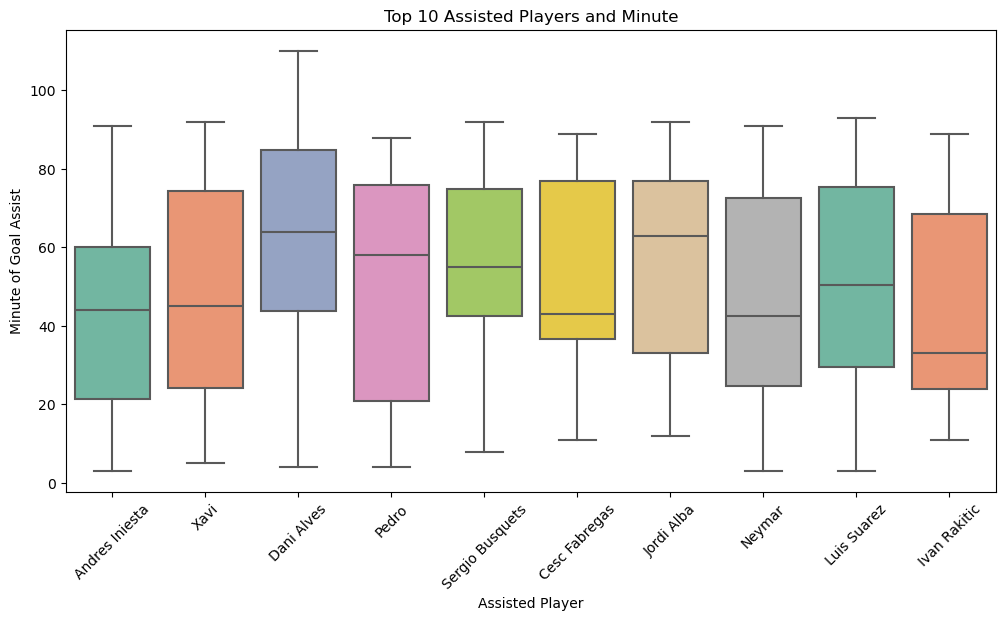

In [434]:
#Box plot of Top 10 Assisted Players and Minute
"""
Displayed only the top 10 players who have assisted messi.
Converted the Minute column to numeric.
Created a box plot for top 10 assisted players and minute of the goal.
"""

top_assist_players = assist_data['Goal_assist'].value_counts().head(10).index
top_assist_data = assist_data[assist_data['Goal_assist'].isin(top_assist_players)]
top_assist_data['Minute'] = pd.to_numeric(top_assist_data['Minute'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_assist_data, x='Goal_assist', y='Minute', palette="Set2")
plt.title('Top 10 Assisted Players and Minute')
plt.xlabel('Assisted Player')
plt.ylabel('Minute of Goal Assist')
plt.xticks(rotation=45)
plt.show()